In [299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#Stastics
from scipy import stats as st
import pylab

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix , r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [300]:
df=pd.read_csv("diabetes.csv")

In [301]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [302]:
df.shape

(768, 9)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [304]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [305]:
df.duplicated().sum()

0

In [306]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Visualization

In [307]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


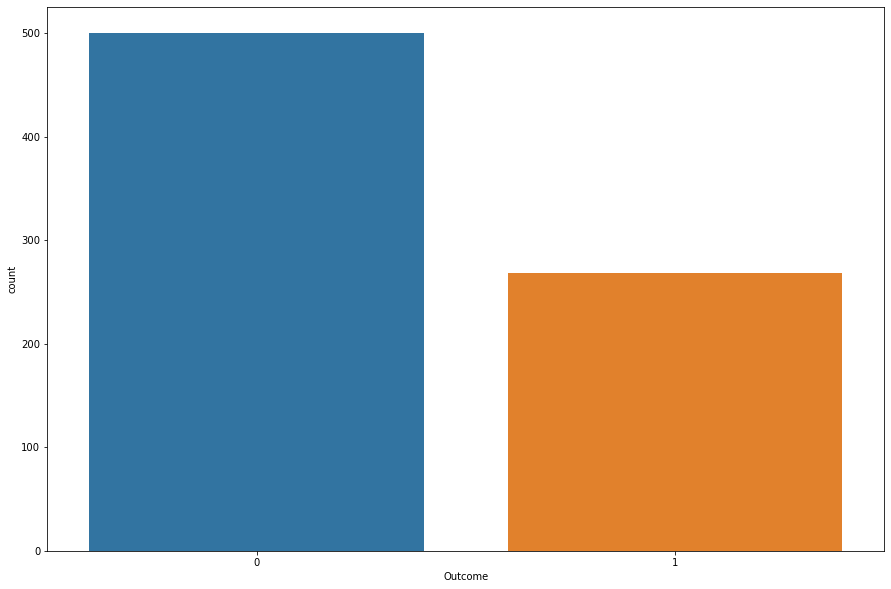

In [308]:
plt.figure(figsize=(15,10))
sns.countplot(df['Outcome'],data=df);

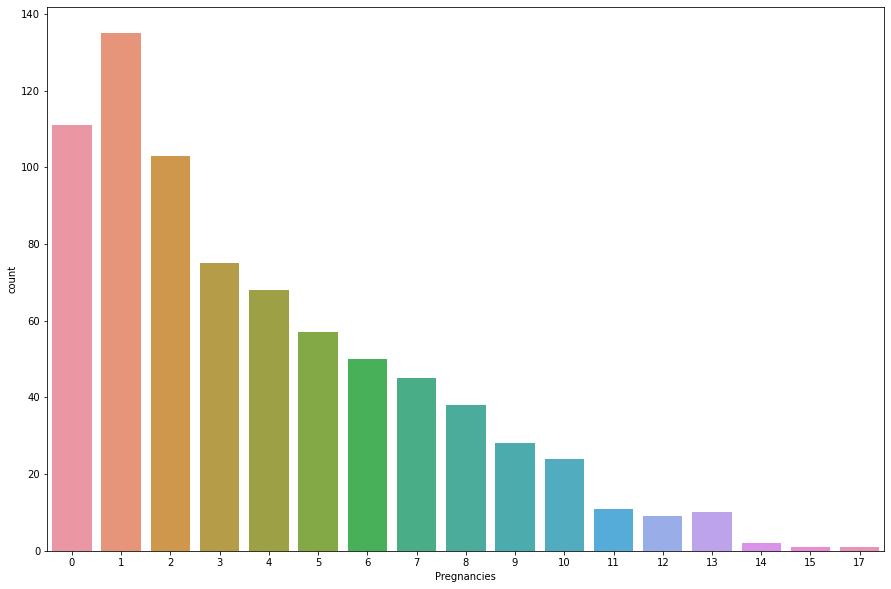

In [309]:
plt.figure(figsize=(15,10))
sns.countplot(df['Pregnancies'],data=df);

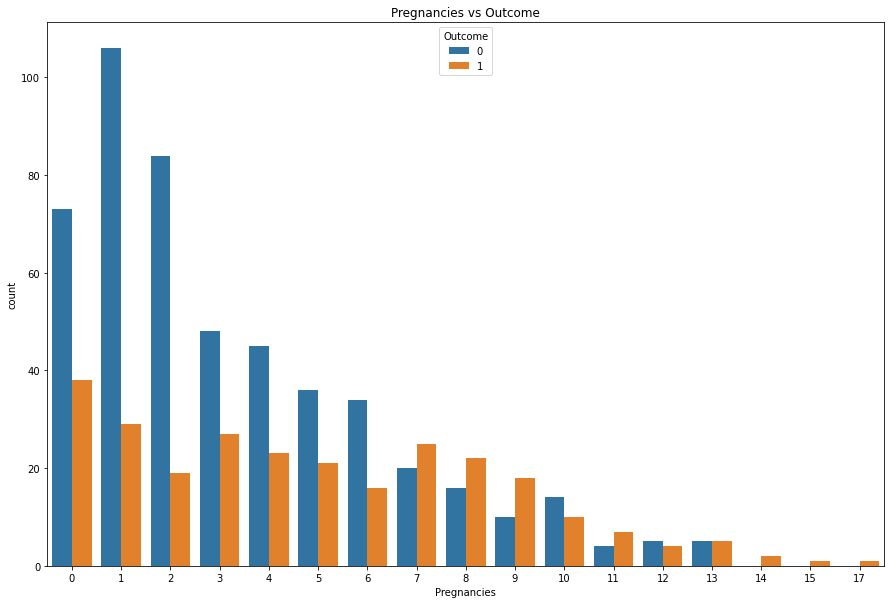

In [310]:
plt.figure(figsize=(15,10))
plt.title("Pregnancies vs Outcome")
sns.countplot(df['Pregnancies'],hue='Outcome',data=df);

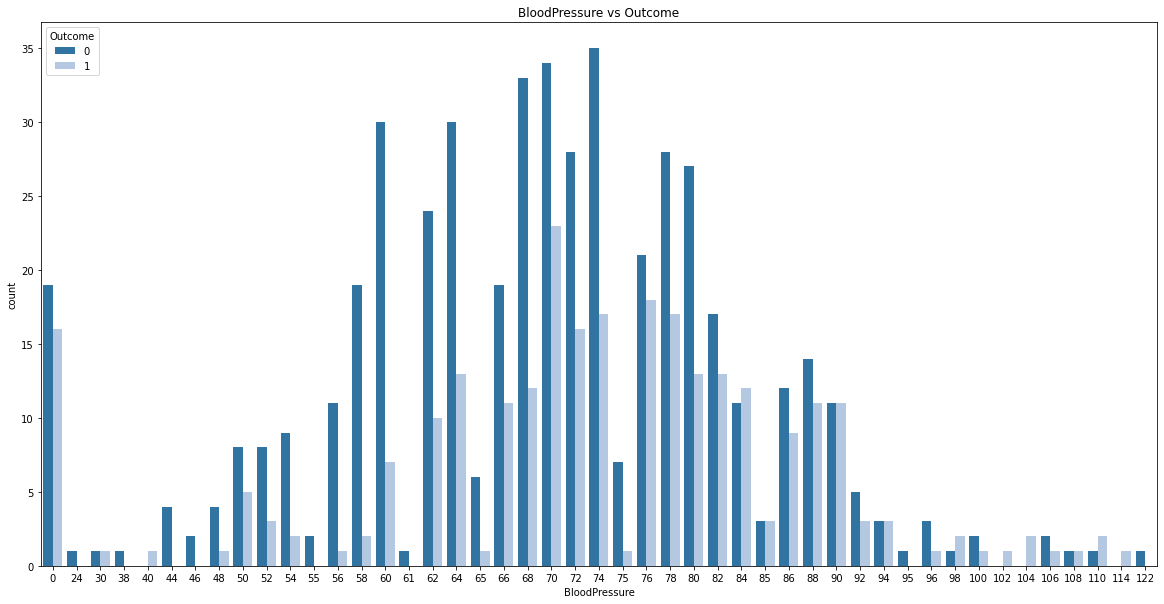

In [311]:
plt.figure(figsize=(20,10))
plt.title("BloodPressure vs Outcome")
sns.countplot(x='BloodPressure',hue='Outcome',palette="tab20",data=df)
plt.show()

In [312]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


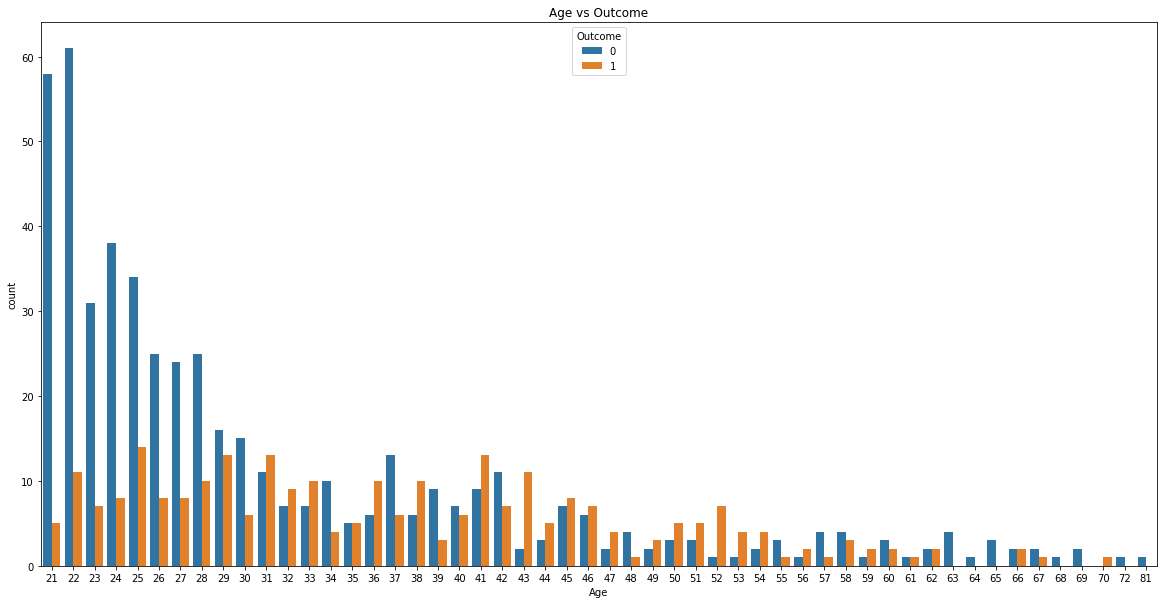

In [313]:
plt.figure(figsize=(20,10))
plt.title("Age vs Outcome")
sns.countplot(x='Age',hue='Outcome',data=df)
plt.show()

<AxesSubplot:>

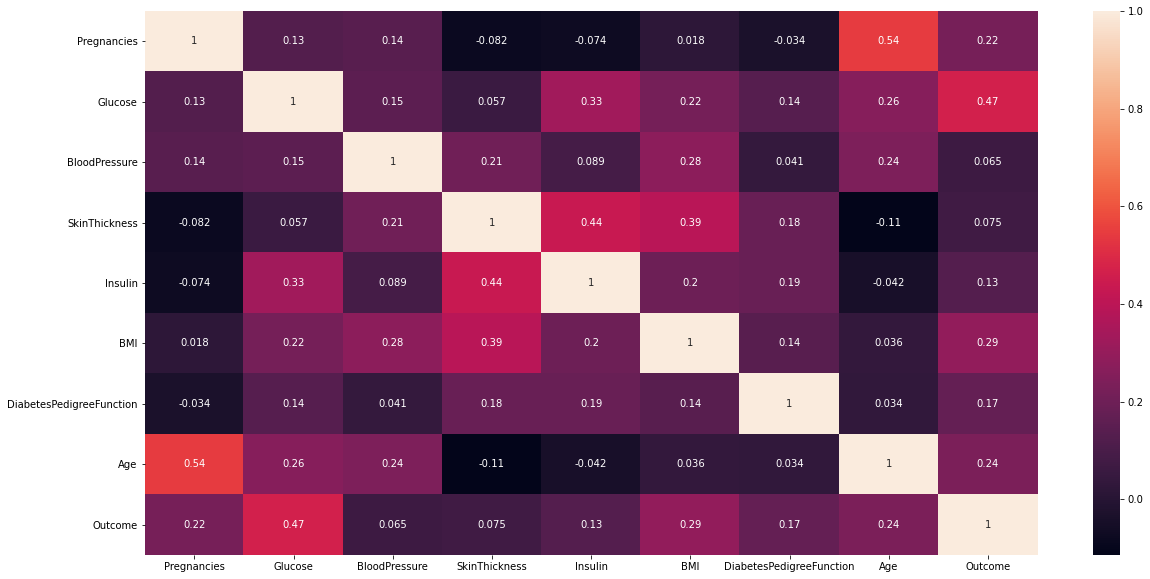

In [314]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Feature selection

In [315]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [316]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [317]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [318]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [319]:
st=StandardScaler()
x_scaled=st.fit_transform(x)

In [320]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [321]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.2,random_state=2)

# Model Building

In [322]:
training_score1=[]
testing_score1=[]

In [323]:
def model_pred_unscaled(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    a = r2_score(y_train,y_pred_train)*100
    b = r2_score(y_test,y_pred)*100
    a.astype(int)
    b.astype(int)
    training_score1.append(a)
    testing_score1.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)


In [324]:
model_pred_unscaled(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 100.0
r2_Score of DecisionTreeRegressor() model on Testing Data is: -19.30682976554534


In [325]:
model_pred_unscaled(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 30.997457941016858
r2_Score of AdaBoostRegressor() model on Testing Data is: 11.636570460009388


In [326]:
model_pred_unscaled(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 67.06658668565149
r2_Score of GradientBoostingRegressor() model on Testing Data is: 16.917050069087914


In [327]:
model_pred_unscaled(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.97248109022692
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [328]:
model_pred_unscaled(GaussianNB())

r2_Score of GaussianNB() model on Training Data is: -1.4026355326689055
r2_Score of GaussianNB() model on Testing Data is: -16.167176350662583


In [329]:
def scaled_model(model):
    model.fit(x_train1,y_train1)
    y_pred=model.predict(x_test1)
    y_pred_train=model.predict(x_train1)
    a=r2_score(y_pred,y_test1)*100
    b=r2_score(y_pred_train,y_train1)*100
    a.astype(int)
    b.astype(int)
    training_score1.append(a)
    testing_score1.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

In [330]:
scaled_model(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: -111.70091914313343
r2_Score of LinearRegression() model on Testing Data is: -110.17184769823683


In [331]:
scaled_model(SVR())

r2_Score of SVR() model on Training Data is: -47.164258511331326
r2_Score of SVR() model on Testing Data is: 19.28143972682418
